<a href="https://colab.research.google.com/github/AlejandroPinto5/linear-models/blob/main/Churn_prediction_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Churn Prediction using Logistic Regression Project**


Predicting Whether a Customer Will Churn or Not. The target outcome which it wants to predict is churn. Churn is defined as as the costumer falling below the minimum value required.

    1. Load data and package for model building and preprocessing.
    2.  Preprocessing and missing value imputation.
    3. Select features on the basis  of EDA conclusions and build baseline problem.
    4. Decide evaluation metric on the basis of bussiness problem.
    5. Build model using all features and compare with baseline.
    6. Use reverse feautre elimination to find the top feature and build model using top 10 features and compare.

In [1]:
#Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
from sklearn.metrics import roc_auc_score, accuracy_score, confusion_matrix, roc_curve, precision_score, recall_score, precision_recall_curve
import warnings

warnings.simplefilter(action = 'ignore', category = FutureWarning)
warnings.simplefilter(action = 'ignore', category = UserWarning)

In [2]:
#Loading dataset
url = 'https://raw.githubusercontent.com/AlejandroPinto5/linear-models/main/churn_prediction.csv'
df = pd.read_csv(url)
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


##DEALING WITH MISSING VALUES

In [5]:
#Checking for NaN values
df.isnull().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

There are missing values on gender, dependets, occupation, city, days_since_last_transaction. Each variable has an imputation strategy:

**Gender**

In [6]:
#Checking value countsof gender
df['gender'].value_counts()

Male      16548
Female    11309
Name: gender, dtype: int64

It can't add male or female to missing values, it could create another category with -1 value:

In [7]:
#Converting gender
dict_gender = {'Male' : 1, 'Female' : 0}
df.replace({'gender' : dict_gender}, inplace = True)
df['gender'] = df['gender'].fillna(-1)
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,1.0,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,1.0,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,1.0,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,-1.0,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,1.0,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


**dependents, occupation and city**


In [8]:
#Checking value counts to dependets
df['dependents'].value_counts()

0.0     21435
2.0      2150
1.0      1395
3.0       701
4.0       179
5.0        41
6.0         8
7.0         3
9.0         1
52.0        1
36.0        1
50.0        1
8.0         1
25.0        1
32.0        1
Name: dependents, dtype: int64

In [15]:
#Checking value counts to occupation
df['occupation'].value_counts()

self_employed    17476
salaried          6704
student           2058
retired           2024
company             40
Name: occupation, dtype: int64

In [25]:
#Cheking Value counts to city
df['city'].value_counts()

1020.0    3479
1096.0    2016
409.0     1334
146.0     1291
834.0     1138
          ... 
748.0        1
1099.0       1
108.0        1
655.0        1
723.0        1
Name: city, Length: 1604, dtype: int64

It can fill missed values with the mode, for dependents is 0, for occupation is self_employed, and for city is 1020

In [26]:
df['dependents'] = df['dependents'].fillna(0)
df['occupation'] = df['occupation'].fillna('self_employed')
df['city'] = df['city'].fillna(1020)
df

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,1.0,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,1.0,0.0,self_employed,1020.0,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,1.0,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,-1.0,0.0,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,1.0,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,30297,1845,10,0.0,0.0,student,1020.0,2,1207,70.0,...,1076.43,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0
28378,30298,4919,34,0.0,0.0,self_employed,1046.0,2,223,14.0,...,4069.21,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0
28379,30299,297,47,1.0,0.0,salaried,1096.0,2,588,0.0,...,61017.55,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1
28380,30300,2585,50,1.0,3.0,self_employed,1219.0,3,274,NaN,...,1625.55,1683.20,1857.42,0.20,0.20,0.20,0.20,1625.55,1625.55,0


**Days since last transaction**

In [ ]:
df['days_since_last_transaction'] = df['days_since_last_transaction'].fillna(999)

The customer who has a missed value would be customer who hasn't any transaction in the last 365 days, so  it put value more than a year.

##PREPROCESSING OF DATA

Let's scale data in the right wayto apply linear models. It will keep all features as numeric values:

**Occupation**
   
    pd.get_dummies()

Convert categorical variable into dummy/indicator variables. Each variable is converted in as many 0/1 variables as there are different values.

In [30]:
#Converting occupation to one hot encoded features
df = pd.concat([df, pd.get_dummies(df['occupation'], prefix = str('occupation'),prefix_sep = '_')], axis = 1)

**Numerical features**

In [33]:
#Scaling with log transformation and standard scaler
num_cols = ['customer_nw_category', 'current_balance', 'previous_month_end_balance', 'average_monthly_balance_prevQ2', 'average_monthly_balance_prevQ', 'current_month_credit', 'previous_month_credit', 'current_month_debit', 'previous_month_debit', 'current_month_balance', 'previous_month_balance']
for i in num_cols:
  df[i] = np.log(df[i] + 17000)

std = StandardScaler()# Scaling with scikitlearn
scaled = std.fit_transform(df[num_cols])
scaled = pd.DataFrame(scaled, columns = num_cols)

In [34]:
#Dropping columns
df_df_og = df.copy()
df = df.drop(columns = num_cols, axis = 1)
df = df.merge(scaled, left_index = True, right_index = True, how = 'left')

y_all = df.churn
df = df.drop(['churn', 'customer_id', 'occupation'], axis = 1)

##MODEL BUILDINDG AND EVALUATION METRIC

It can use two popular metrics: 

1. ***Recall*** because if falsely marked as churn, it doesn't cost a lot of the bank. In a scenario the bank would only go ahead and check with the customer whether they are comfortable or not. On the other hand, there will be a huge cost if a customer is missed by the bank. So if a customer is likely to churn but the bank misses it, that's going to be a cost for the bank.  
2.   AUC-ROC would tell us how good the model is in differeatnig the two classes.


In [35]:
# Baseline columns
baseline_cols = ['current_month_debit', 'previous_month_debit', 'current_balance', 'previous_month_end_balance', 'vintage', 'occupation_retired', 'occupation_salaried', 'occupation_self_employed', 'occupation_student']
df_baseline = df[baseline_cols]

In [36]:
#Splitting dataset with sklearn - train_test_split() function
xtrain, xtest, ytrain,ytest = train_test_split(df_baseline, y_all, test_size = 1/3, random_state = 11, stratify = y_all)

In [37]:
#Fitting and predicting
model = LogisticRegression()
model.fit(xtrain, ytrain)
pred = model.predict_proba(xtest)[:,1]

Where is logistic regression fallinng? It can use AUC-ROC and confusion matrix.

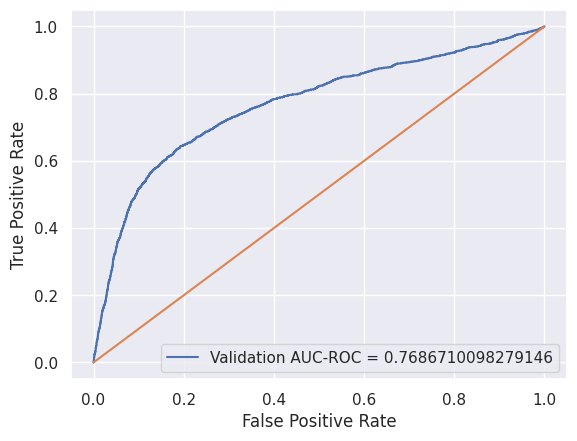

In [40]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(ytest,pred)
auc = roc_auc_score(ytest,pred)

sb.set()
plt.plot(fpr, tpr, label = 'Validation AUC-ROC = ' + str(auc))
x = np.linspace(0, 1, 1000)
plt.plot(x, x, linestyle = '-')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc = 4)